In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## 1- Loading Data

In [2]:
path = "../data/pre_prpocessed_dataset.csv"
data = pd.read_csv(path)

In [3]:
data.head()

,account_open_date,age,location,occupation,income_level,fico_score,delinquency_status,charge_off_status,number_of_credit_applications,debt_to_income_ratio,...,number_of_delinquent_accounts,number_of_defaulted_accounts,earliest_credit_account,recent_trade_activity,new_accounts_opened_last_12months,multiple_applications_short_time_period,unusual_submission_pattern,applications_submitted_during_odd_hours,watchlist_blacklist_flag,public_records_flag
0,2023-11-09,56,Los Angeles,Teacher,40099,424.0,108,1,10,3.139572,...,4.0,2,2018-09-11,2024-03-07,3,1,1,0,0,1
1,2022-09-11,69,New York,Engineer,2050,483.0,0,0,1,1.017489,...,3.0,2,2023-03-08,2024-01-28,3,0,1,0,0,0
2,2020-07-12,46,Miami,Engineer,71936,566.0,0,0,1,1.508626,...,2.0,0,2024-04-26,2024-10-03,2,0,0,0,0,0
3,2023-10-26,38,Los Angeles,Banker,6925,740.0,0,0,1,1.659631,...,0.0,0,2022-03-01,2024-01-04,0,0,0,1,0,0
4,2020-10-29,56,Dallas,Accountant,25139,563.0,0,0,1,0.876580,...,1.0,1,2022-09-11,2023-11-21,2,0,0,0,0,0


In [4]:
data.describe()

,age,income_level,fico_score,delinquency_status,charge_off_status,number_of_credit_applications,debt_to_income_ratio,payment_methods_high_risk,max_balance,avg_balance_last_12months,number_of_delinquent_accounts,number_of_defaulted_accounts,new_accounts_opened_last_12months,multiple_applications_short_time_period,unusual_submission_pattern,applications_submitted_during_odd_hours,watchlist_blacklist_flag,public_records_flag
count,6748.000000,6748.000000,6748.000000,6748.000000,6748.000000,6748.000000,6748.000000,6748.000000,6748.000000,6748.000000,6748.000000,6748.000000,6748.000000,6748.000000,6748.000000,6748.000000,6748.000000,6748.000000
mean,46.148488,23717.458062,616.211618,25.252964,0.260670,1.811648,1.477336,0.237404,50462.244115,33472.154979,1.209247,0.499555,1.383669,0.258447,0.207024,0.314908,0.126260,0.201986
std,16.411338,21872.292686,130.181643,42.736714,0.439033,1.934514,0.684346,0.425523,50151.749003,21801.235282,1.562802,0.730357,1.594867,0.437813,0.405203,0.464514,0.332166,0.401511
min,18.000000,2000.000000,301.000000,0.000000,0.000000,1.000000,0.438413,0.000000,930.516529,457.869809,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.000000,6921.750000,521.000000,0.000000,0.000000,1.000000,1.052407,0.000000,25530.592888,14274.514672,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,46.000000,14976.000000,635.500000,0.000000,0.000000,1.000000,1.320511,0.000000,44815.552299,30352.353060,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,61.000000,38267.500000,722.000000,29.000000,1.000000,1.000000,1.719710,0.000000,70145.742751,50725.277651,3.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,74.000000,99957.000000,848.000000,119.000000,1.000000,10.000000,9.975930,1.000000,999922.083300,92117.793445,4.000000,2.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6748 entries, 0 to 6747
Data columns (total 23 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   account_open_date                        6748 non-null   object 
 1   age                                      6748 non-null   int64  
 2   location                                 6748 non-null   object 
 3   occupation                               6748 non-null   object 
 4   income_level                             6748 non-null   int64  
 5   fico_score                               6748 non-null   float64
 6   delinquency_status                       6748 non-null   int64  
 7   charge_off_status                        6748 non-null   int64  
 8   number_of_credit_applications            6748 non-null   int64  
 9   debt_to_income_ratio                     6748 non-null   float64
 10  payment_methods_high_risk                6748 no

In [6]:
# Date conversions
data['account_open_date'] = pd.to_datetime(data['account_open_date'])
data['earliest_credit_account'] = pd.to_datetime(data['earliest_credit_account'])
data['recent_trade_activity'] = pd.to_datetime(data['recent_trade_activity'])

In [7]:
# Categorical conversions
data['location'] = data['location'].astype('category')
data['occupation'] = data['occupation'].astype('category')

## 2 - Univariate Analysis

### 2.1 `Age`

C:\Users\hcham\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


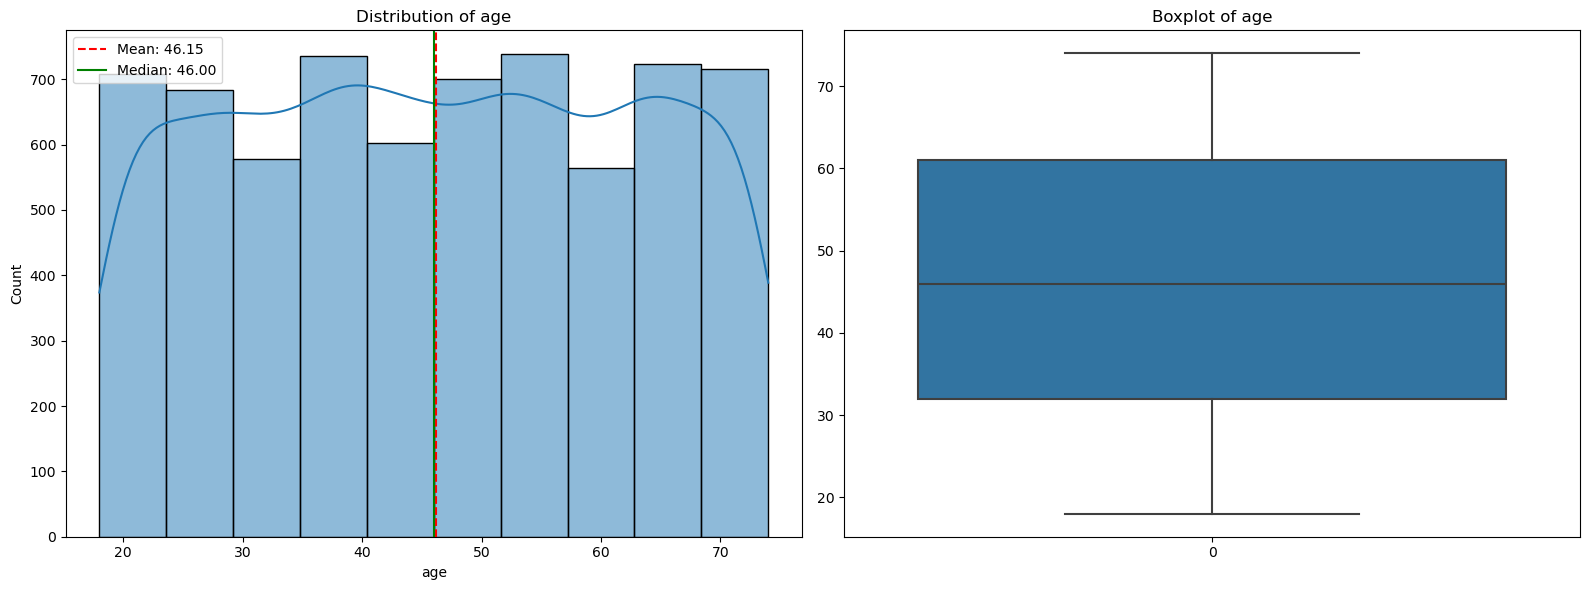

In [8]:
col = "age"
mean_value = data[col].mean()
median_value = data[col].median()

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.histplot(data[col], kde=True, bins=10, ax=axes[0])
axes[0].axvline(mean_value, color='r', linestyle='--', label=f'Mean: {mean_value:.2f}')
axes[0].axvline(median_value, color='g', linestyle='-', label=f'Median: {median_value:.2f}')
axes[0].set_title(f"Distribution of {col}")
axes[0].legend()

sns.boxplot(data[col], ax=axes[1])
axes[1].set_title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()

### 2.2 `Income_Level`

C:\Users\hcham\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


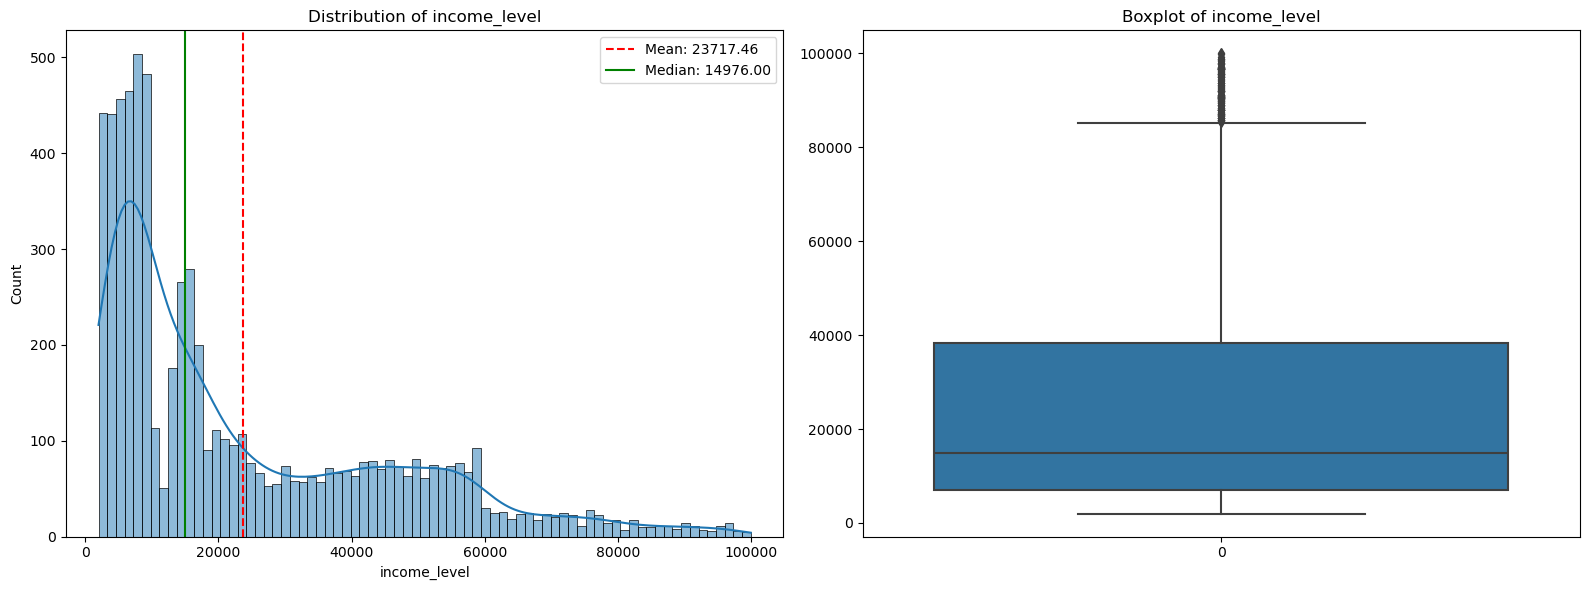

In [9]:
col = "income_level"
mean_value = data[col].mean()
median_value = data[col].median()

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.histplot(data[col], kde=True, bins=75, ax=axes[0])
axes[0].axvline(mean_value, color='r', linestyle='--', label=f'Mean: {mean_value:.2f}')
axes[0].axvline(median_value, color='g', linestyle='-', label=f'Median: {median_value:.2f}')
axes[0].set_title(f"Distribution of {col}")
axes[0].legend()

sns.boxplot(data[col], ax=axes[1])
axes[1].set_title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()

### 2.3 `Fico_score`

C:\Users\hcham\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


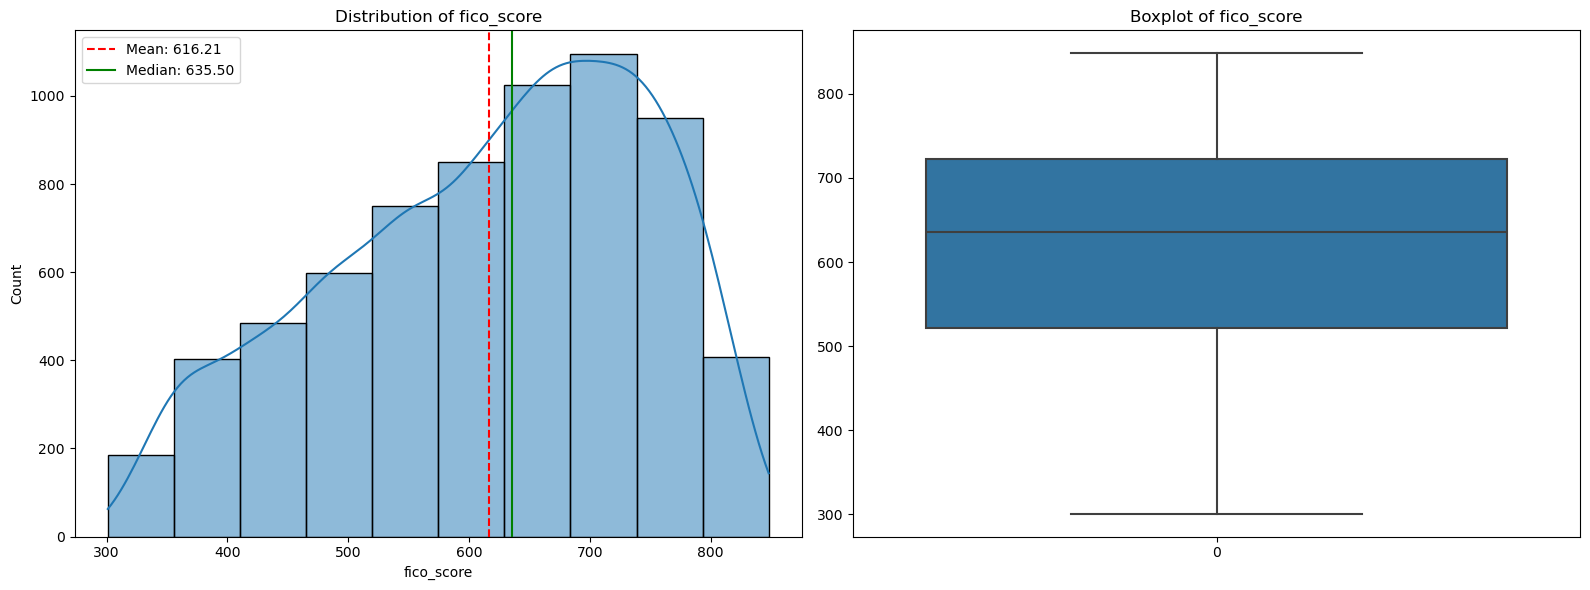

In [10]:
col = "fico_score"
mean_value = data[col].mean()
median_value = data[col].median()

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.histplot(data[col], kde=True, bins=10, ax=axes[0])
axes[0].axvline(mean_value, color='r', linestyle='--', label=f'Mean: {mean_value:.2f}')
axes[0].axvline(median_value, color='g', linestyle='-', label=f'Median: {median_value:.2f}')
axes[0].set_title(f"Distribution of {col}")
axes[0].legend()

sns.boxplot(data[col], ax=axes[1])
axes[1].set_title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()

### 2.4 `delinquency_status`

C:\Users\hcham\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


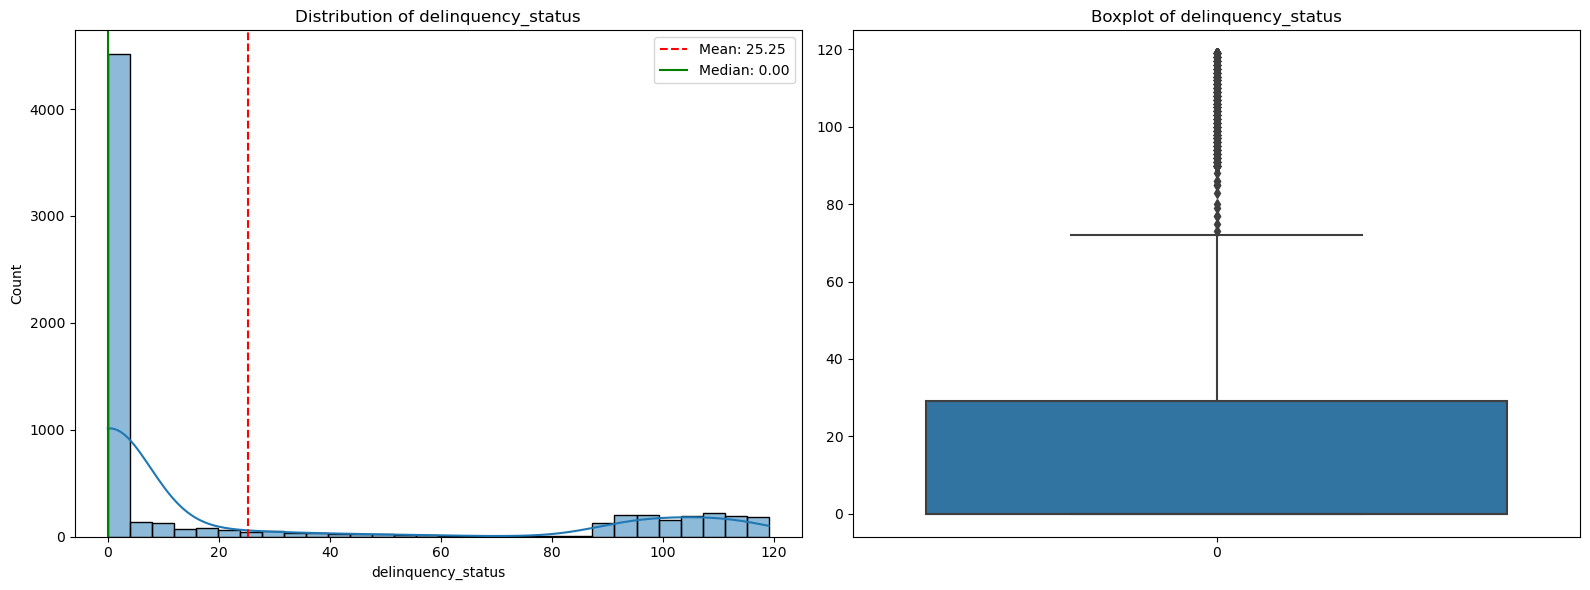

In [11]:
col = "delinquency_status"
mean_value = data[col].mean()
median_value = data[col].median()

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.histplot(data[col], kde=True, bins=30, ax=axes[0])
axes[0].axvline(mean_value, color='r', linestyle='--', label=f'Mean: {mean_value:.2f}')
axes[0].axvline(median_value, color='g', linestyle='-', label=f'Median: {median_value:.2f}')
axes[0].set_title(f"Distribution of {col}")
axes[0].legend()

sns.boxplot(data[col], ax=axes[1])
axes[1].set_title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()

### 2.5 `number_of_credit_applications`

C:\Users\hcham\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


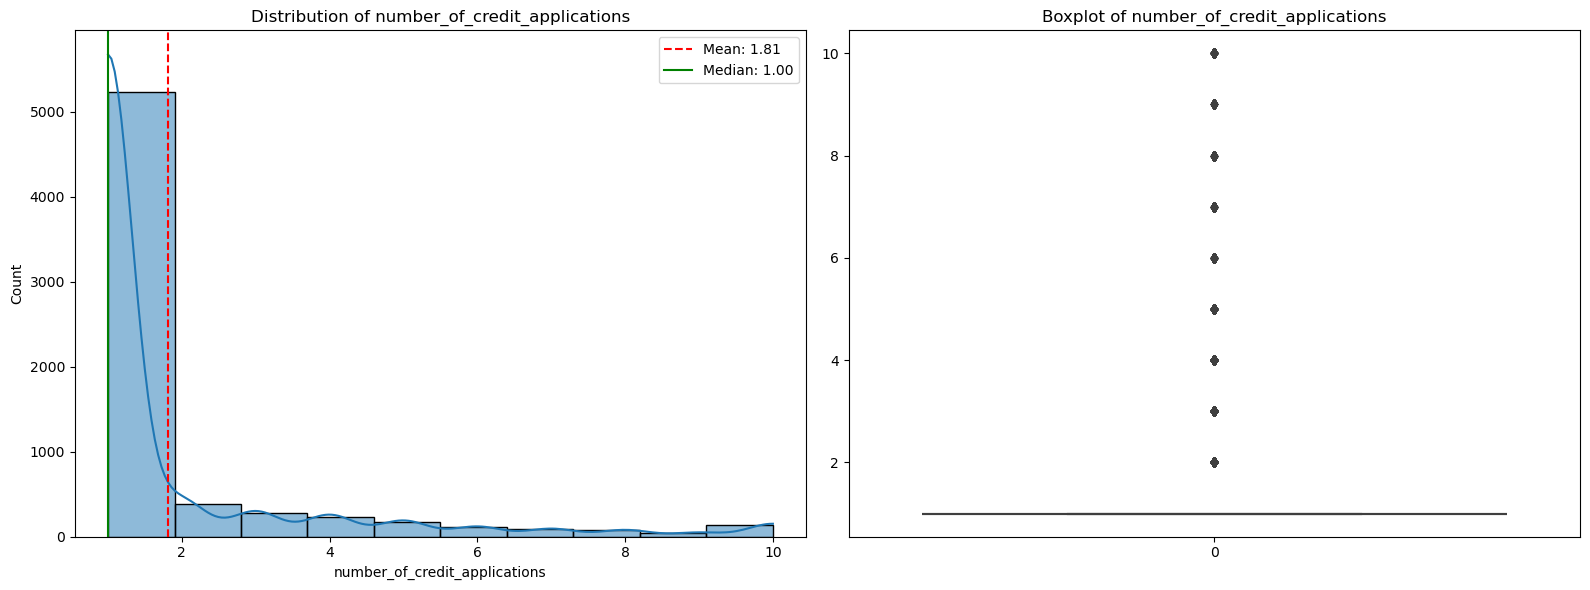

In [12]:
col = "number_of_credit_applications"
mean_value = data[col].mean()
median_value = data[col].median()

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.histplot(data[col], kde=True, bins=10, ax=axes[0])
axes[0].axvline(mean_value, color='r', linestyle='--', label=f'Mean: {mean_value:.2f}')
axes[0].axvline(median_value, color='g', linestyle='-', label=f'Median: {median_value:.2f}')
axes[0].set_title(f"Distribution of {col}")
axes[0].legend()

sns.boxplot(data[col], ax=axes[1])
axes[1].set_title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()

### 2.6 `Debt_to_income_ratio`

C:\Users\hcham\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


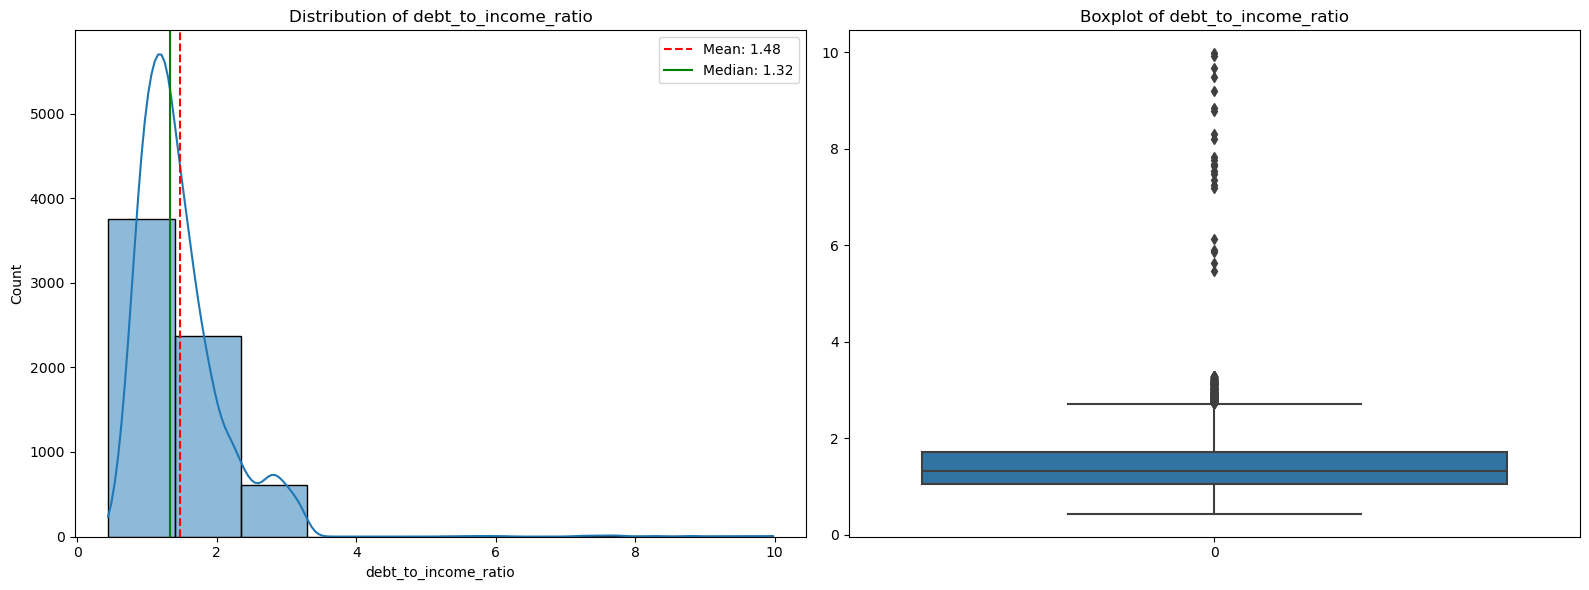

In [13]:
col = "debt_to_income_ratio"
mean_value = data[col].mean()
median_value = data[col].median()

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.histplot(data[col], kde=True, bins=10, ax=axes[0])
axes[0].axvline(mean_value, color='r', linestyle='--', label=f'Mean: {mean_value:.2f}')
axes[0].axvline(median_value, color='g', linestyle='-', label=f'Median: {median_value:.2f}')
axes[0].set_title(f"Distribution of {col}")
axes[0].legend()

sns.boxplot(data[col], ax=axes[1])
axes[1].set_title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()

### 2.7 `Max_balance`

C:\Users\hcham\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


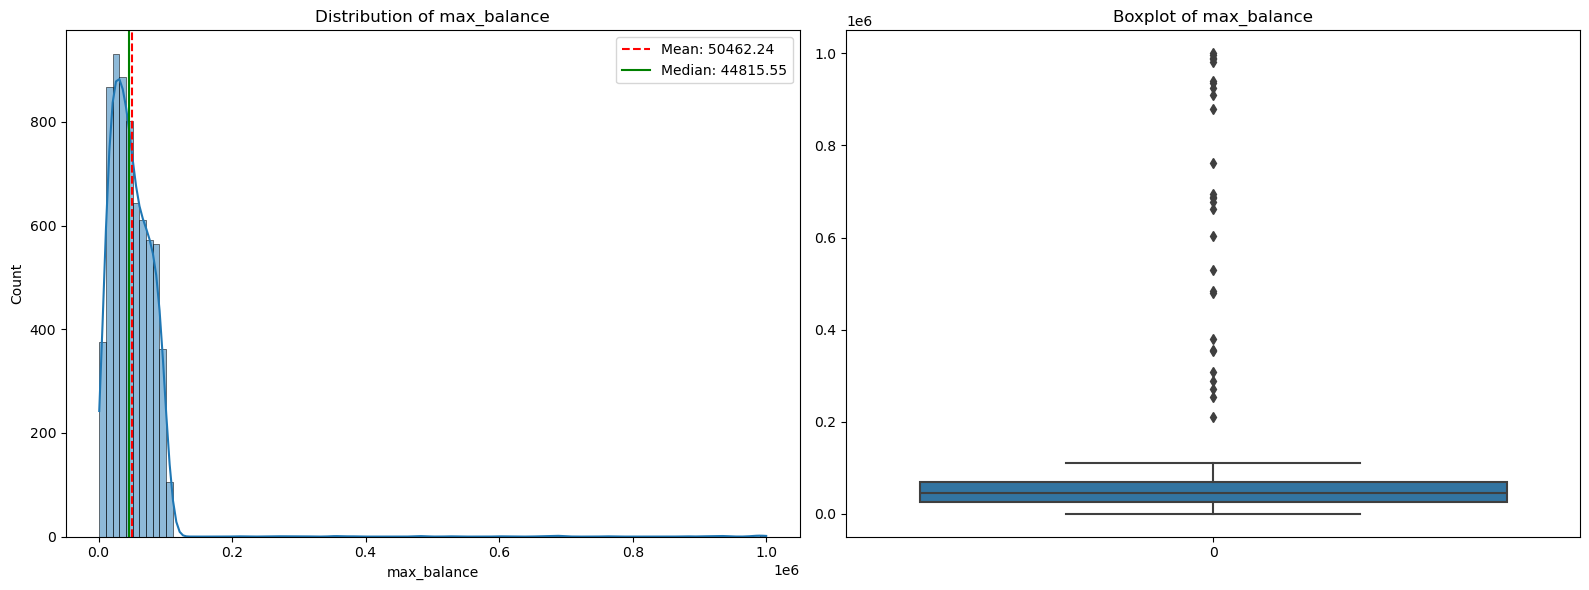

In [14]:
col = "max_balance"
mean_value = data[col].mean()
median_value = data[col].median()

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.histplot(data[col], kde=True, bins=100, ax=axes[0])
axes[0].axvline(mean_value, color='r', linestyle='--', label=f'Mean: {mean_value:.2f}')
axes[0].axvline(median_value, color='g', linestyle='-', label=f'Median: {median_value:.2f}')
axes[0].set_title(f"Distribution of {col}")
axes[0].legend()

sns.boxplot(data[col], ax=axes[1])
axes[1].set_title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()

### 2.8 `Avg_balance_last_12months`

C:\Users\hcham\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


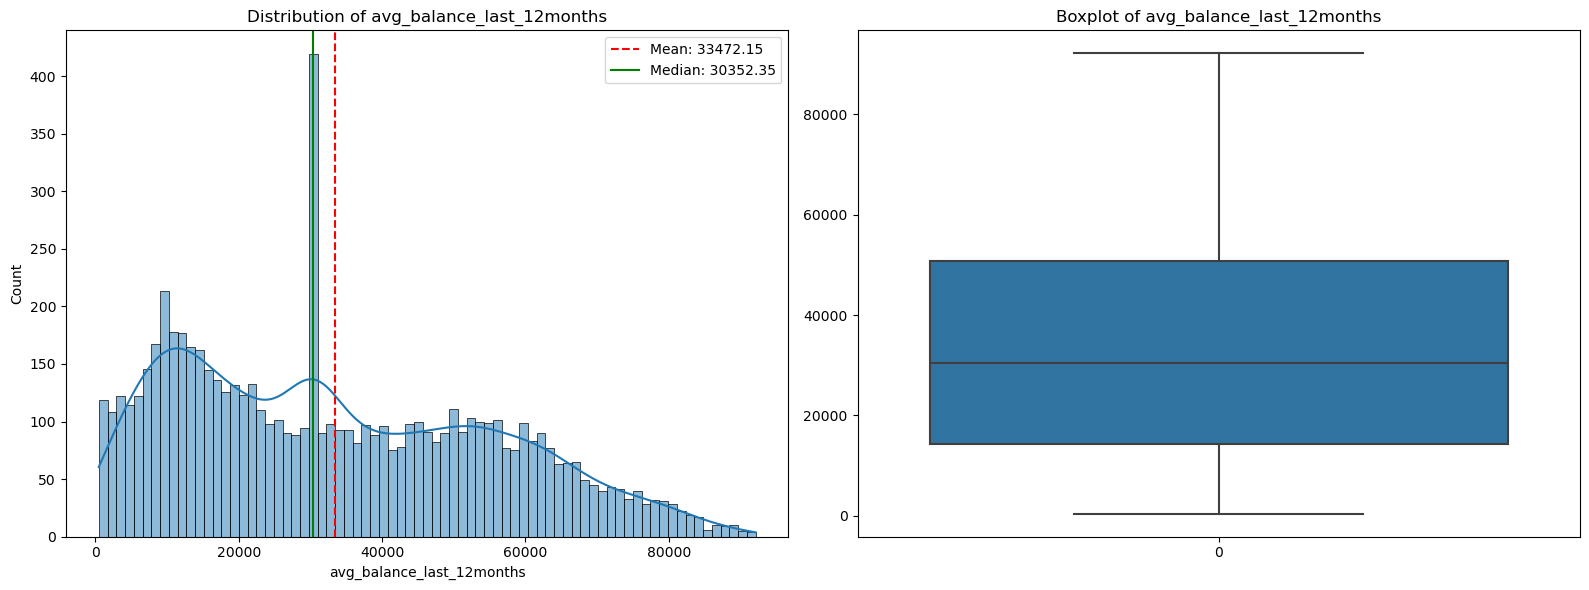

In [15]:
col = "avg_balance_last_12months"
mean_value = data[col].mean()
median_value = data[col].median()

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.histplot(data[col], kde=True, bins=75, ax=axes[0])
axes[0].axvline(mean_value, color='r', linestyle='--', label=f'Mean: {mean_value:.2f}')
axes[0].axvline(median_value, color='g', linestyle='-', label=f'Median: {median_value:.2f}')
axes[0].set_title(f"Distribution of {col}")
axes[0].legend()

sns.boxplot(data[col], ax=axes[1])
axes[1].set_title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()

### 2.9 `Number_of_delinquent_accounts`

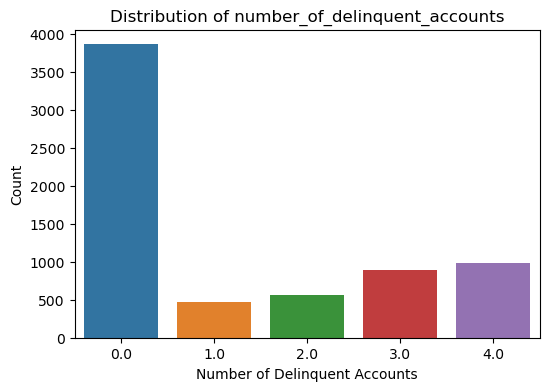

In [16]:
col = "number_of_delinquent_accounts"

plt.figure(figsize=(6, 4))
sns.countplot(x=col, data=data)
plt.title('Distribution of number_of_delinquent_accounts')
plt.xlabel('Number of Delinquent Accounts')
plt.ylabel('Count')
plt.show()

### 2.10 `Number_of_defaulted_accounts`

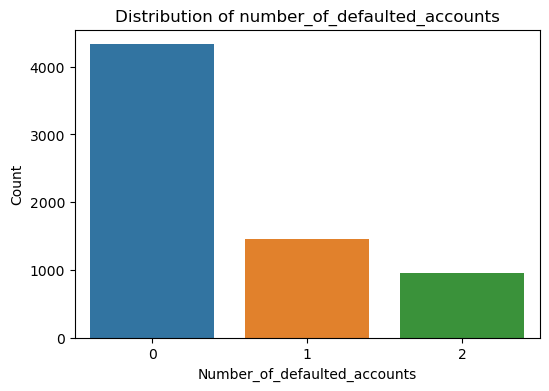

In [17]:
col = "number_of_defaulted_accounts"

plt.figure(figsize=(6, 4))
sns.countplot(x=col, data=data)
plt.title('Distribution of number_of_defaulted_accounts')
plt.xlabel('Number_of_defaulted_accounts')
plt.ylabel('Count')
plt.show()

### 2.11 `New_accounts_opened_last_12months`

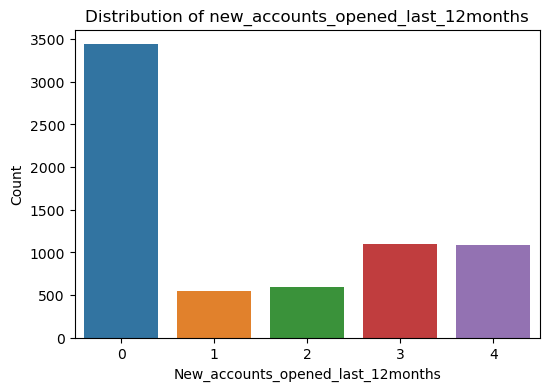

In [18]:
col = "new_accounts_opened_last_12months"

plt.figure(figsize=(6, 4))
sns.countplot(x=col, data=data)
plt.title('Distribution of new_accounts_opened_last_12months')
plt.xlabel('New_accounts_opened_last_12months')
plt.ylabel('Count')
plt.show()

### 2.12 `Location`

C:\Users\hcham\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


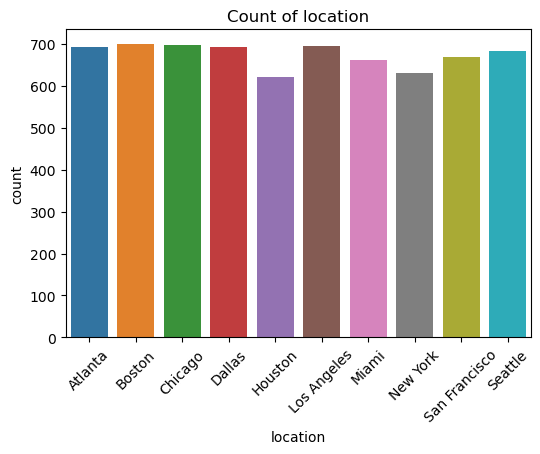

In [19]:
col= "location"
plt.figure(figsize=(6, 4))
sns.countplot(x=col, data=data)
plt.title(f"Count of {col}")
plt.xticks(rotation=45)
plt.show()

### 2.13 `Occupation`

C:\Users\hcham\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


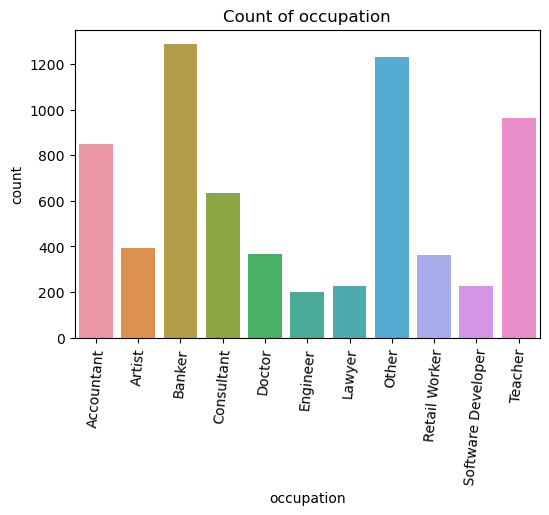

In [20]:
col= "occupation"
plt.figure(figsize=(6, 4))
sns.countplot(x=col, data=data)
plt.title(f"Count of {col}")
plt.xticks(rotation=85)
plt.show()

### 2.14 `Account_open_date`

C:\Users\hcham\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


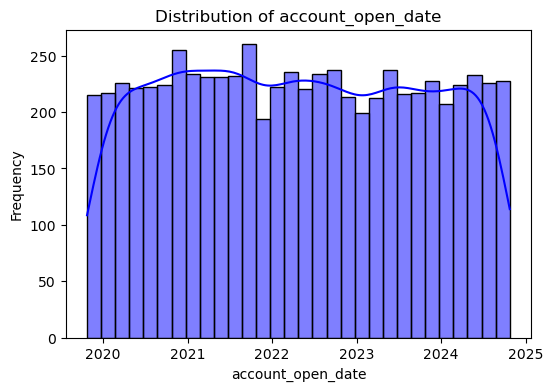

In [21]:
col = "account_open_date"
plt.figure(figsize=(6, 4))
sns.histplot(data[col], kde=True, color='blue', bins=30)
plt.title(f"Distribution of {col}")
plt.xlabel(f'{col}')
plt.ylabel('Frequency')
plt.show()

### 2.15 `Earliest_credit_account`

C:\Users\hcham\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


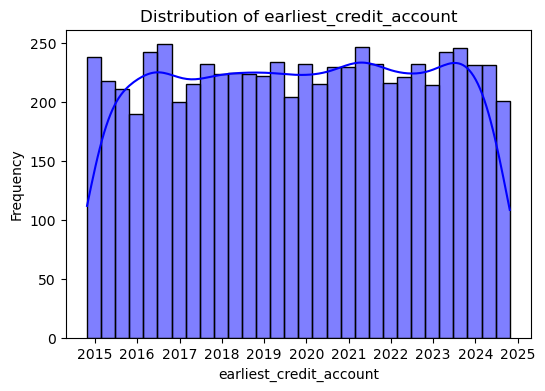

In [22]:
col = "earliest_credit_account"
plt.figure(figsize=(6, 4))
sns.histplot(data[col], kde=True, color='blue', bins=30)
plt.title(f"Distribution of {col}")
plt.xlabel(f'{col}')
plt.ylabel('Frequency')
plt.show()

### 2.16 `Recent_trade_activity`

C:\Users\hcham\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


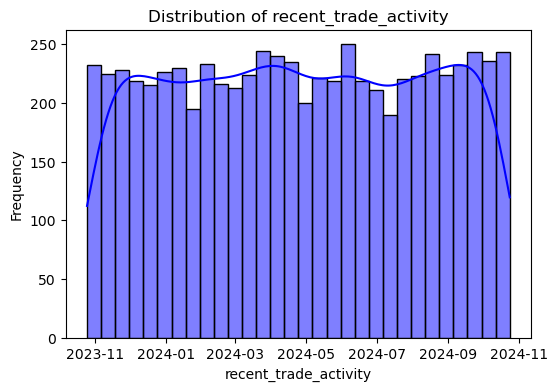

In [23]:
col = "recent_trade_activity"
plt.figure(figsize=(6, 4))
sns.histplot(data[col], kde=True, color='blue', bins=30)
plt.title(f"Distribution of {col}")
plt.xlabel(f'{col}')
plt.ylabel('Frequency')
plt.show()

### 2.17 `Payment_methods_high_risk`

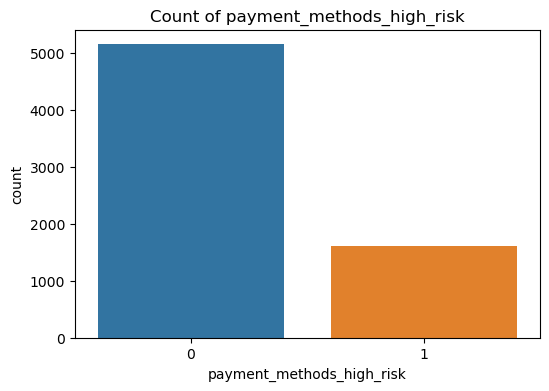

In [26]:
col= "payment_methods_high_risk"
plt.figure(figsize=(6, 4))
sns.countplot(x=col, data=data)
plt.title(f"Count of {col}")
plt.show()

### 2.18 `Multiple_applications_short_time_period`

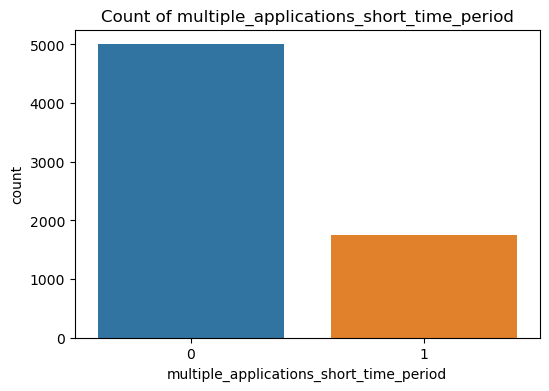

In [24]:
col= "multiple_applications_short_time_period"
plt.figure(figsize=(6, 4))
sns.countplot(x=col, data=data)
plt.title(f"Count of {col}")
plt.show()

### 2.19 `Unusual_submission_pattern`

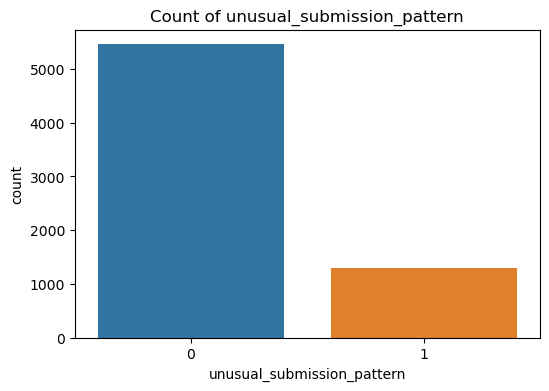

In [25]:
col= "unusual_submission_pattern"
plt.figure(figsize=(6, 4))
sns.countplot(x=col, data=data)
plt.title(f"Count of {col}")
plt.show()

### 2.20 `Applications_submitted_during_odd_hours`

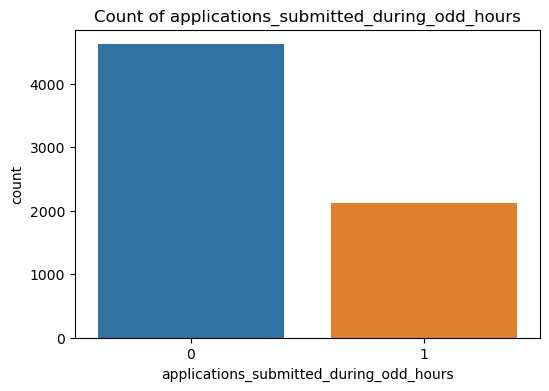

In [26]:
col= "applications_submitted_during_odd_hours"
plt.figure(figsize=(6, 4))
sns.countplot(x=col, data=data)
plt.title(f"Count of {col}")
plt.show()

### 2.21 `Watchlist_blacklist_flag`

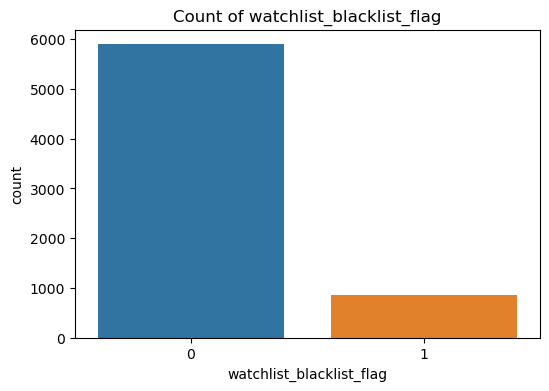

In [27]:
col= "watchlist_blacklist_flag"
plt.figure(figsize=(6, 4))
sns.countplot(x=col, data=data)
plt.title(f"Count of {col}")
plt.show()

### 2.22 `Public_records_flag`

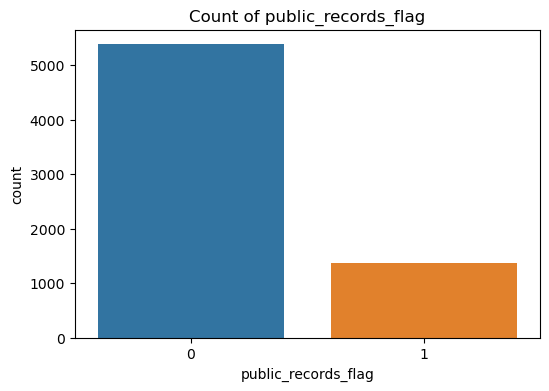

In [28]:
col= "public_records_flag"
plt.figure(figsize=(6, 4))
sns.countplot(x=col, data=data)
plt.title(f"Count of {col}")
plt.show()

## 3. Bivariate Analysis

### 3.1 Correlation Analysis 

C:\Users\hcham\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


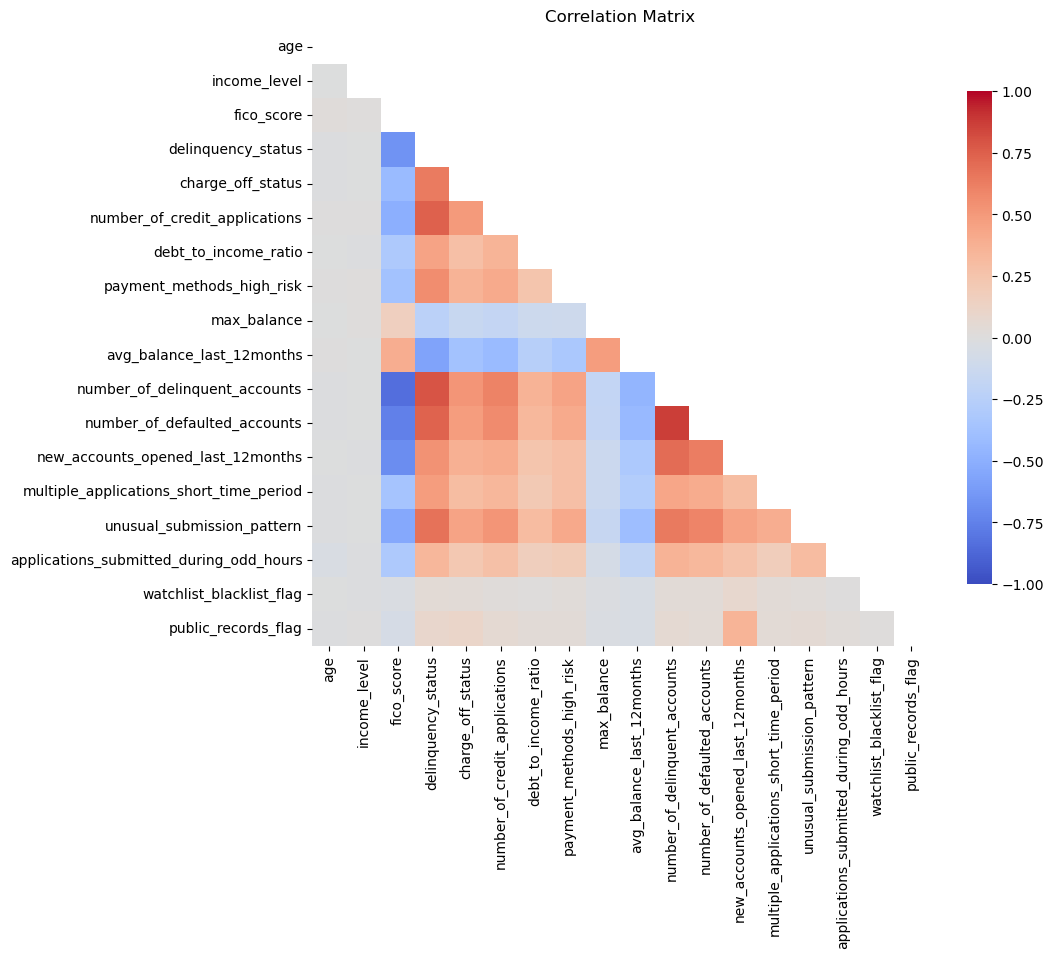

In [28]:
numerical_data = data.select_dtypes(include=['number'])
correlation_matrix = numerical_data.corr()

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', vmin=-1, vmax=1, square=True, cbar_kws={"shrink": .8})
plt.title("Correlation Matrix")
plt.show()

### 3.2 Relationship with `charge_off_status` (target variable)

In [29]:
target_variable = "charge_off_status"

### 3.2.5 `number_of_credit_applications`

### 3.2.6 `debt_to_income_ratio`

### 3.2.1 `age`

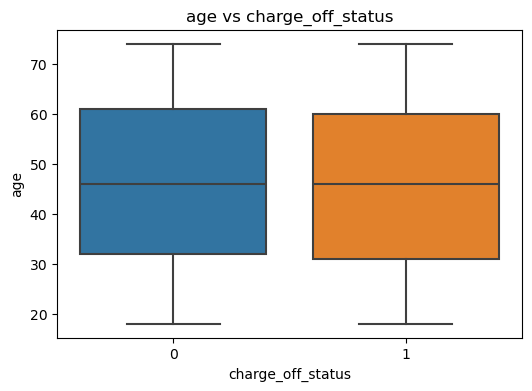

In [31]:
col = "age"
plt.figure(figsize=(6, 4))
sns.boxplot(x=target_variable, y=col, data=data)  
plt.title(f"{col} vs {target_variable}")
plt.show()

### 3.2.2 `income_level`

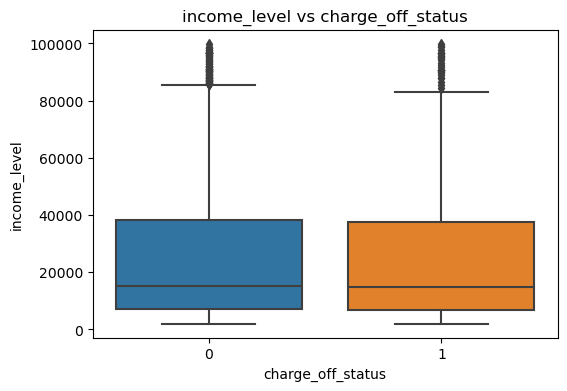

In [64]:
col = "income_level"
plt.figure(figsize=(6, 4))
sns.boxplot(x=target_variable, y=col, data=data)  
# sns.stripplot(x=target_variable, y=col, data=data, 
#               color='green', size=4, jitter=True, alpha=0.3)
plt.title(f"{col} vs {target_variable}")
plt.show()

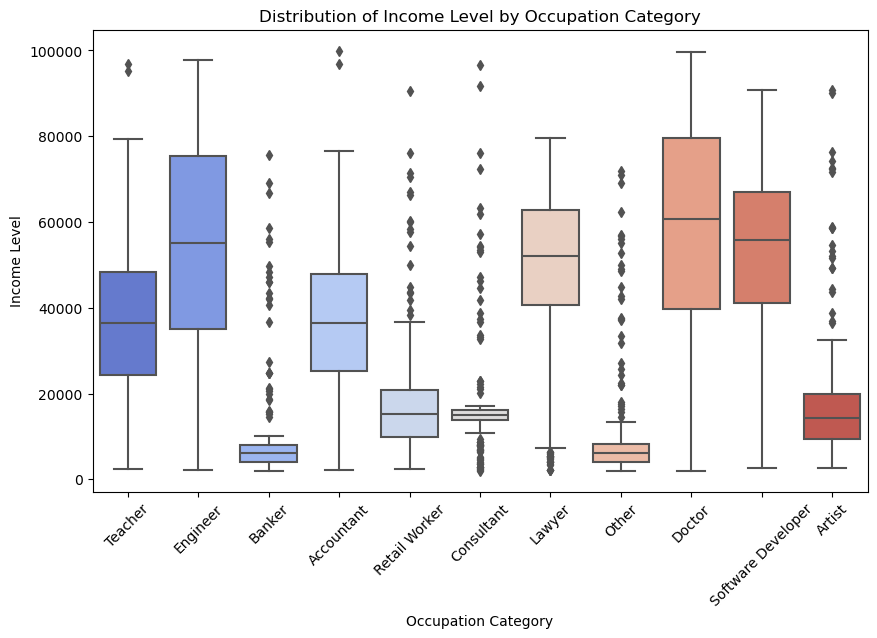

In [57]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='occupation', y='income_level', data=data, palette='coolwarm')

plt.title('Distribution of Income Level by Occupation Category')
plt.xlabel('Occupation Category')
plt.ylabel('Income Level')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

### 3.2.3 `fico_score`

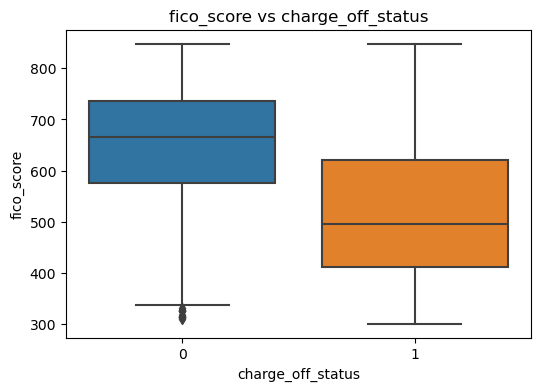

In [33]:
col = "fico_score"
plt.figure(figsize=(6, 4))
sns.boxplot(x=target_variable, y=col, data=data)  
plt.title(f"{col} vs {target_variable}")
plt.show()

### 3.2.7 `max_balance`

### 3.2.4 `delinquency_status`

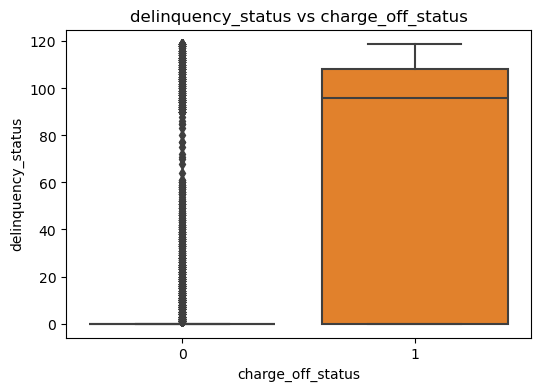

In [34]:
col = "delinquency_status"
plt.figure(figsize=(6, 4))
sns.boxplot(x=target_variable, y=col, data=data)  
plt.title(f"{col} vs {target_variable}")
plt.show()

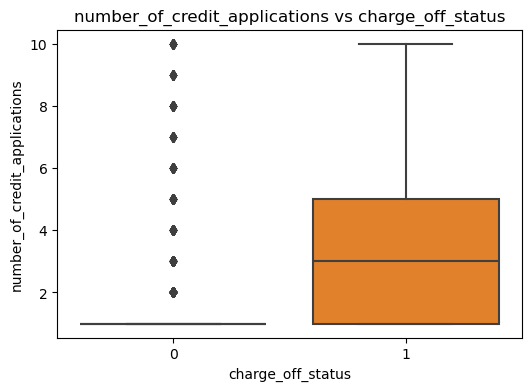

In [35]:
col = "number_of_credit_applications"
plt.figure(figsize=(6, 4))
sns.boxplot(x=target_variable, y=col, data=data)  
plt.title(f"{col} vs {target_variable}")
plt.show()

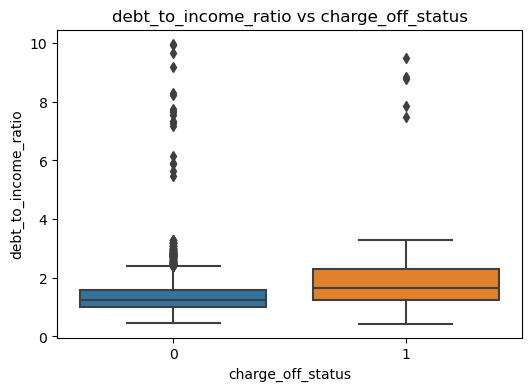

In [36]:
col = "debt_to_income_ratio"
plt.figure(figsize=(6, 4))
sns.boxplot(x=target_variable, y=col, data=data)  
plt.title(f"{col} vs {target_variable}")
plt.show()

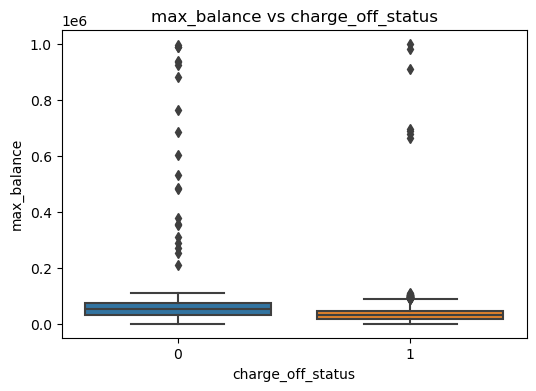

In [38]:
col = "max_balance"
plt.figure(figsize=(6, 4))
sns.boxplot(x=target_variable, y=col, data=data)  
plt.title(f"{col} vs {target_variable}")
plt.show()

### 3.2.8 `avg_balance_last_12months`

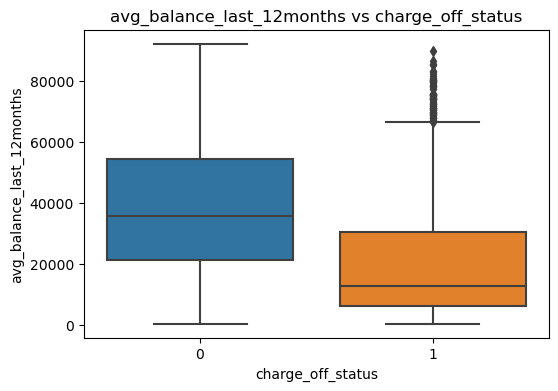

In [39]:
col = "avg_balance_last_12months"
plt.figure(figsize=(6, 4))
sns.boxplot(x=target_variable, y=col, data=data)  
plt.title(f"{col} vs {target_variable}")
plt.show()

### 3.2.9 `number_of_delinquent_accounts`

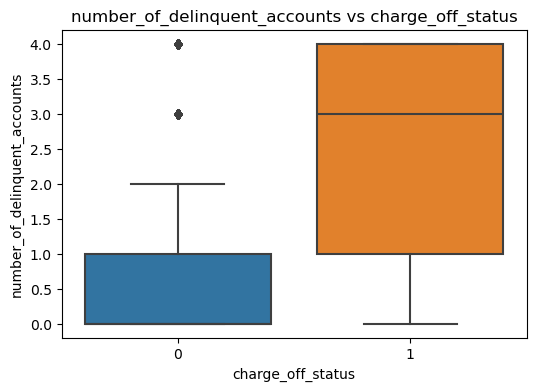

In [40]:
col = "number_of_delinquent_accounts"
plt.figure(figsize=(6, 4))
sns.boxplot(x=target_variable, y=col, data=data)  
plt.title(f"{col} vs {target_variable}")
plt.show()

### 3.2.10 `number_of_defaulted_accounts`

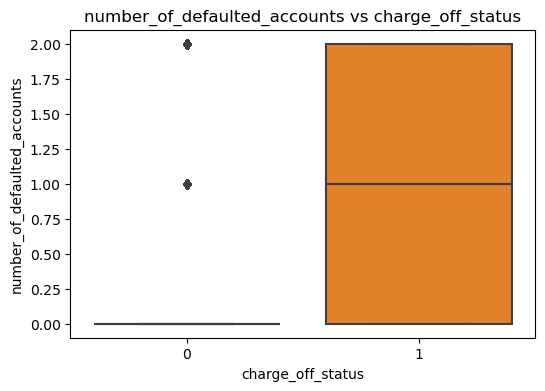

In [41]:
col = "number_of_defaulted_accounts"
plt.figure(figsize=(6, 4))
sns.boxplot(x=target_variable, y=col, data=data)  
plt.title(f"{col} vs {target_variable}")
plt.show()

### 3.2.11 `new_accounts_opened_last_12months`

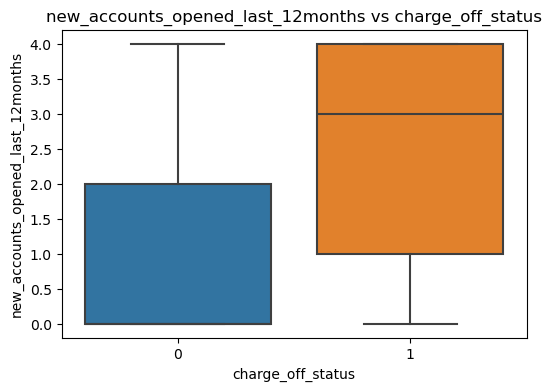

In [42]:
col = "new_accounts_opened_last_12months"
plt.figure(figsize=(6, 4))
sns.boxplot(x=target_variable, y=col, data=data)  
plt.title(f"{col} vs {target_variable}")
plt.show()